In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
import random
#from tf.keras.layersConvLSTM1D
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.2.0


In [22]:

# seed for reproducing same results
seed = 9
np.random.seed(seed)
norm ='Normalized_feature_full.csv'
raw ="feature_full.csv"
less= 'lessSmote.csv'
# load pima indians dataset
dataset = np.loadtxt(less, delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:, 0:-1]
Y = dataset[:,-1]

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=seed)
for i in range(len(Y_train)):
    Y_train[i] = int(Y_train[i])-1
    
for i in range(len(Y_test)):
    Y_test[i] = int(Y_test[i])-1
    
from tensorflow.keras.utils import to_categorical
Y_test = to_categorical(Y_test)
print(Y_test)
Y_train = to_categorical(Y_train)
print(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train=Y_train
y_test=Y_test

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [23]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old = 0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_Conv1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
                
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 21, 16)            96        
_________________________________________________________________
lstm_5 (LSTM)                (None, 21, 128)           74240     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 10756     
Total params: 85,092
Trainable params: 85,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 1s 117ms/step - loss: 1.0204 - acc: 0.6131 - val_loss: 0.8212 - val_acc: 0.7363
Epoch 2/200
12/12 [==============================] - 1s 83ms/step - loss: 0.7499 - acc: 0.7509 - val_loss: 0.7104 -

12/12 [==============================] - 1s 81ms/step - loss: 0.2941 - acc: 0.8934 - val_loss: 0.3102 - val_acc: 0.8879
Epoch 57/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2932 - acc: 0.8939 - val_loss: 0.3098 - val_acc: 0.8867
Epoch 58/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2900 - acc: 0.8951 - val_loss: 0.3076 - val_acc: 0.8921
Epoch 59/200
12/12 [==============================] - 1s 84ms/step - loss: 0.2896 - acc: 0.8957 - val_loss: 0.3059 - val_acc: 0.8885
Epoch 60/200
12/12 [==============================] - 1s 85ms/step - loss: 0.2922 - acc: 0.8941 - val_loss: 0.3073 - val_acc: 0.8852
Epoch 61/200
12/12 [==============================] - 1s 86ms/step - loss: 0.2904 - acc: 0.8959 - val_loss: 0.3042 - val_acc: 0.8889
Epoch 62/200
12/12 [==============================] - 1s 85ms/step - loss: 0.2878 - acc: 0.8970 - val_loss: 0.3041 - val_acc: 0.8889
Epoch 63/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2896 

12/12 [==============================] - 1s 82ms/step - loss: 0.2705 - acc: 0.9031 - val_loss: 0.2857 - val_acc: 0.8955
Epoch 179/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2688 - acc: 0.9035 - val_loss: 0.2822 - val_acc: 0.8987
Epoch 180/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2629 - acc: 0.9076 - val_loss: 0.2798 - val_acc: 0.9006
Epoch 181/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2989 - acc: 0.8927 - val_loss: 0.3428 - val_acc: 0.8853
Epoch 182/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3102 - acc: 0.8881 - val_loss: 0.3185 - val_acc: 0.8903
Epoch 183/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2971 - acc: 0.8927 - val_loss: 0.3142 - val_acc: 0.8841
Epoch 184/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2931 - acc: 0.8936 - val_loss: 0.3119 - val_acc: 0.8860
Epoch 185/200
12/12 [==============================] - 1s 82ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


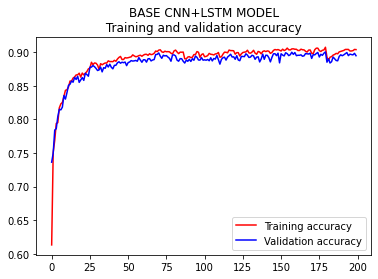

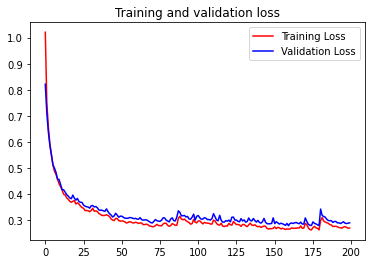

average_accuracy= 0.8835243278741837
precision= 0.9006339311599731
average_loss= 0.32490797474980354


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BASE CNN+LSTM MODEL\n Training and validation accuracy ')
plt.savefig('./images/FIG_2/A1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_2/A2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [25]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_3 (Local (None, 17, 16)            1632      
_________________________________________________________________
lstm_6 (LSTM)                (None, 17, 128)           74240     
_________________________________________________________________
flatten_6 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 8708      
Total params: 84,580
Trainable params: 84,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 1s 102ms/step - loss: 0.8769 - acc: 0.6830 - val_loss: 0.7470 - val_acc: 0.7451
Epoch 2/200
12/12 [==============================] - 1s 70ms/step - loss: 0.6824 - acc: 0.7646 - val_loss: 0.6497 -

12/12 [==============================] - 1s 69ms/step - loss: 0.2985 - acc: 0.8941 - val_loss: 0.3112 - val_acc: 0.8907
Epoch 57/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2939 - acc: 0.8972 - val_loss: 0.3055 - val_acc: 0.8883
Epoch 58/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2903 - acc: 0.8970 - val_loss: 0.3019 - val_acc: 0.8903
Epoch 59/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2872 - acc: 0.8966 - val_loss: 0.3026 - val_acc: 0.8922
Epoch 60/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2869 - acc: 0.8978 - val_loss: 0.3079 - val_acc: 0.8907
Epoch 61/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2860 - acc: 0.8981 - val_loss: 0.3019 - val_acc: 0.8896
Epoch 62/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2862 - acc: 0.8971 - val_loss: 0.3021 - val_acc: 0.8867
Epoch 63/200
12/12 [==============================] - 1s 68ms/step - loss: 0.2864 

12/12 [==============================] - 1s 70ms/step - loss: 0.2528 - acc: 0.9069 - val_loss: 0.2673 - val_acc: 0.9035
Epoch 179/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2520 - acc: 0.9074 - val_loss: 0.2700 - val_acc: 0.8975
Epoch 180/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2585 - acc: 0.9068 - val_loss: 0.2782 - val_acc: 0.8992
Epoch 181/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2649 - acc: 0.9059 - val_loss: 0.2780 - val_acc: 0.9018
Epoch 182/200
12/12 [==============================] - 1s 71ms/step - loss: 0.2601 - acc: 0.9078 - val_loss: 0.2729 - val_acc: 0.9036
Epoch 183/200
12/12 [==============================] - 1s 71ms/step - loss: 0.2590 - acc: 0.9076 - val_loss: 0.2747 - val_acc: 0.9013
Epoch 184/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2612 - acc: 0.9067 - val_loss: 0.2810 - val_acc: 0.8996
Epoch 185/200
12/12 [==============================] - 1s 70ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


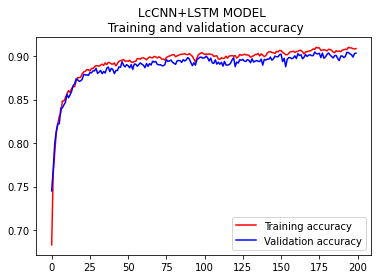

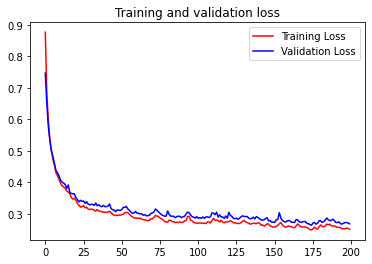

average_accuracy= 0.8881715640425683
precision= 0.904708981513977
average_loss= 0.3105216068029404


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+LSTM MODEL \n Training and validation accuracy')
plt.savefig('./images/FIG_2/B1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_2/B2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [27]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1)#, callbacks = [red_lr,saver])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_4 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
98/98 [==============================] - 3s 32ms/step - loss: 0.5553 - acc: 0.7999 - val_loss: 0.4008 - val_acc: 0.8607
Epoch 2/200
98/98 [==============================] - 2s 24ms/step - loss: 0.3515 - acc: 0.8736 - val_loss: 0.3484 

98/98 [==============================] - 2s 23ms/step - loss: 0.2563 - acc: 0.9054 - val_loss: 0.2755 - val_acc: 0.8994
Epoch 57/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2540 - acc: 0.9059 - val_loss: 0.2776 - val_acc: 0.8996
Epoch 58/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2515 - acc: 0.9070 - val_loss: 0.2777 - val_acc: 0.8970
Epoch 59/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2538 - acc: 0.9055 - val_loss: 0.2877 - val_acc: 0.8971
Epoch 60/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2557 - acc: 0.9048 - val_loss: 0.2737 - val_acc: 0.9015
Epoch 61/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2535 - acc: 0.9050 - val_loss: 0.2717 - val_acc: 0.8994
Epoch 62/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2488 - acc: 0.9074 - val_loss: 0.2768 - val_acc: 0.9003
Epoch 63/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2478 

98/98 [==============================] - 2s 25ms/step - loss: 0.2201 - acc: 0.9181 - val_loss: 0.2424 - val_acc: 0.9100
Epoch 179/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2190 - acc: 0.9191 - val_loss: 0.2393 - val_acc: 0.9129
Epoch 180/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2221 - acc: 0.9183 - val_loss: 0.2587 - val_acc: 0.9069
Epoch 181/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2182 - acc: 0.9190 - val_loss: 0.2381 - val_acc: 0.9133
Epoch 182/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2147 - acc: 0.9201 - val_loss: 0.2390 - val_acc: 0.9135
Epoch 183/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2148 - acc: 0.9208 - val_loss: 0.2358 - val_acc: 0.9156
Epoch 184/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2144 - acc: 0.9206 - val_loss: 0.2553 - val_acc: 0.9096
Epoch 185/200
98/98 [==============================] - 2s 24ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


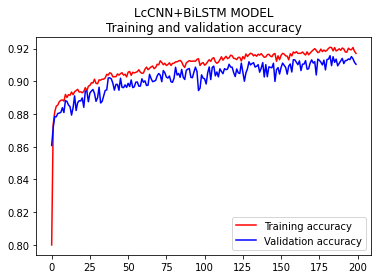

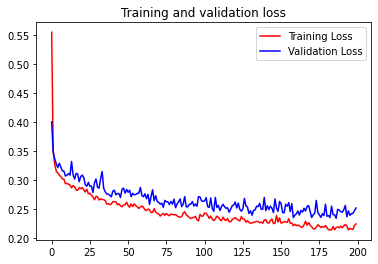

average_accuracy= 0.9022509658336639
precision= 0.915617048740387
average_loss= 0.2669510016590357


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_2/C1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_2/C2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [29]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_5 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_8 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
98/98 [==============================] - 3s 35ms/step - loss: 0.5384 - acc: 0.8047 - val_loss: 0.4066 - val_acc: 0.8496 - lr: 0.0010
Epoch 2/200
98/98 [==============================] - 2s 25ms/step - loss: 0.3618 - acc: 0.8710 - val_

Epoch 46/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2441 - acc: 0.9109 - val_loss: 0.2617 - val_acc: 0.9040 - lr: 1.0000e-04
Epoch 47/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2436 - acc: 0.9107 - val_loss: 0.2606 - val_acc: 0.9024 - lr: 1.0000e-04
Epoch 48/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2427 - acc: 0.9113 - val_loss: 0.2593 - val_acc: 0.9031 - lr: 1.0000e-04
Epoch 49/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2415 - acc: 0.9115 - val_loss: 0.2589 - val_acc: 0.9033 - lr: 1.0000e-04
Epoch 50/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2413 - acc: 0.9117 - val_loss: 0.2586 - val_acc: 0.9038 - lr: 1.0000e-04
Epoch 51/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2412 - acc: 0.9111 - val_loss: 0.2601 - val_acc: 0.9027 - lr: 1.0000e-04
Epoch 52/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2413 - acc: 0.9109 - va

Epoch 101/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2300 - acc: 0.9154 - val_loss: 0.2526 - val_acc: 0.9052 - lr: 1.0000e-04
Epoch 102/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2308 - acc: 0.9138 - val_loss: 0.2498 - val_acc: 0.9047 - lr: 1.0000e-04
Epoch 103/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2303 - acc: 0.9145 - val_loss: 0.2488 - val_acc: 0.9078 - lr: 1.0000e-04
Epoch 104/200
98/98 [==============================] - 2s 24ms/step - loss: 0.2294 - acc: 0.9140 - val_loss: 0.2514 - val_acc: 0.9030 - lr: 1.0000e-04
Epoch 105/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2295 - acc: 0.9145 - val_loss: 0.2488 - val_acc: 0.9067 - lr: 1.0000e-04
Epoch 106/200
98/98 [==============================] - 2s 23ms/step - loss: 0.2298 - acc: 0.9142 - val_loss: 0.2491 - val_acc: 0.9057 - lr: 1.0000e-04
Epoch 107/200
98/98 [==============================] - 3s 26ms/step - loss: 0.2299 - acc: 0.91

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


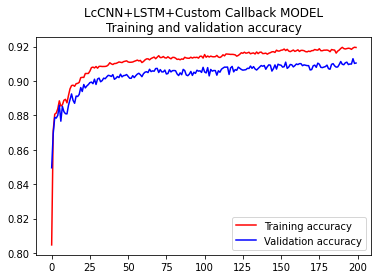

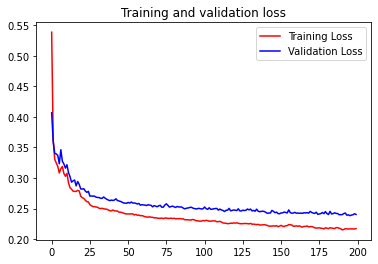

average_accuracy= 0.9037033835053444
precision= 0.9129826426506042
average_loss= 0.257891631051898


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+LSTM+Custom Callback MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_2/D1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_2/D2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [31]:
# red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
# old =0
# class myCallback(tf.keras.callbacks.Callback):
#         def on_epoch_end(self,epoch,logs={}):
#             global old
#             if(logs.get('val_acc') > old):
#                 model.save('NF_LocallyConnected1D.h5',overwrite=True)
#                 old = logs.get('val_acc')
# saver =myCallback()
# #88.92
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
#     #tf.keras.layers.MaxPooling1D(2),
#     #tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
#     tf.keras.layers.Conv1D(16, (3),activation='relu',strides =1,padding="same"),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
#     tf.keras.layers.Conv1D(8, (2),activation='relu',strides =1,padding="same"),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Flatten(),
#                                                                         #acc=89.36 at 80th
#                                                                         #acc=89.40 at 120th
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4, activation='softmax')
#     ])
# model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
# model.summary()
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

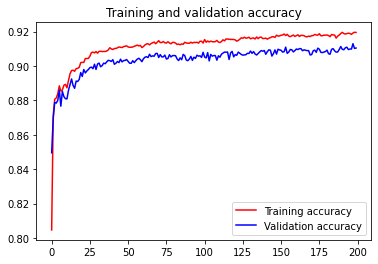

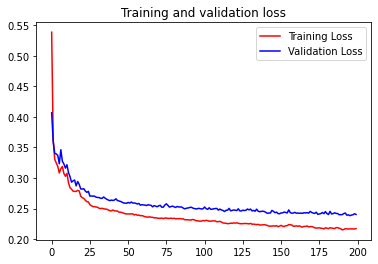

average_accuracy= 0.9037033835053444
precision= 0.9129826426506042
average_loss= 0.257891631051898


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)
